In [128]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import umap
import umap.plot
import bokeh.plotting as bpl
from bokeh.io import output_file, show, save
from plot import plot_bokeh

In [126]:
plott = plot_bokeh(umap_reduced.embedding_, labels=df.lista.to_list(), hover_data=hover_data, point_size=2, width=1200, height=1200, interactive_text_search=True)

bpl.show(plott)

In [3]:
import psutil
psutil.virtual_memory()

svmem(total=16618618880, available=8126636032, percent=51.1, used=6342692864, free=3087159296, active=7404048384, inactive=3912028160, buffers=1702617088, cached=5486149632, shared=1794818048, slab=450318336)

In [4]:
df = pd.read_csv('parsed/corpus/2015.csv', index_col=0, na_filter=False)
docs = df.text.to_list()

In [5]:
topic_model = BERTopic.load('/media/marcin/Dane/model/2015-default', embedding_model='xlm-r-distilroberta-base-paraphrase-v1')

with open('/media/marcin/Dane/model/topics.txt') as f:
    content = f.read()
    topics = eval(content)

topics_over_time = pd.read_csv('/media/marcin/Dane/model/topics_over_time.csv', index_col=0)

df['topic'] = topics


In [ ]:
with open('polish_stopwords.txt') as f:
    stop_words = [x.strip() for x in f]

vectorizer_model = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))

topic_model = BERTopic(embedding_model='xlm-r-distilroberta-base-paraphrase-v1', n_gram_range=(1, 3), verbose=True)

In [3]:
topics, _ = topic_model.fit_transform(docs)

In [ ]:
topics_over_time = topic_model.topics_over_time(df.text.to_list(), topics, df.date.to_list(), nr_bins=48)

Error: Session cannot generate requests

In [6]:
topic_model.save("model/2015-default", save_embedding_model=False)

with open('model/topics.txt','w') as f:
    print(topics, file=f)

topics_over_time.to_csv('model/topics_over_time.csv')

In [5]:
topic_model.get_topic_freq().head()

Topic  Count
0     -1  26517
1    161   1159
2    174    915
3     80    731
4     94    605

In [ ]:
topic_model.visualize_topics()

Error: Session cannot generate requests

In [11]:
topic_model.visualize_topics_over_time(topics_over_time, top_n=20)

In [26]:
umap_reduced = umap.UMAP(n_neighbors=15,
                        n_components=2,
                        min_dist=0.0,
                        metric='cosine',
                        low_memory=True)

umap_reduced.fit_transform(topic_model.umap_model.embedding_)

array([[21.026651 , -3.6032858],
       [ 9.056263 , 11.964548 ],
       [ 8.561875 , 11.433163 ],
       ...,
       [-8.369508 ,  6.70788  ],
       [-8.343141 ,  7.702232 ],
       [-8.295478 ,  5.355971 ]], dtype=float32)

In [51]:
topic_list = sorted(list(topic_model.topics.keys()))
topic_words = {topic: " | ".join([word[0] for word in topic_model.get_topic(topic)[:5]]) for topic in topic_list}

df['topic_words'] = [topic_words[t] for t in df.topic]

In [33]:
umap.plot.output_notebook()

Loading BokehJS ...

In [133]:
p = plot_bokeh(umap_reduced.embedding_, labels=df.lista.to_list(), hover_data=hover_data, point_size=2, width=1200, height=1200, interactive_text_search=True)
output_file("search-plot.html")
save(p)
# show(p)

'/home/marcin/mgr/search-plot.html'

/media/marcin/Dane/.miniconda3/envs/mgr-bertopic/lib/python3.8/site-packages/umap/plot.py:854: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<AxesSubplot:>

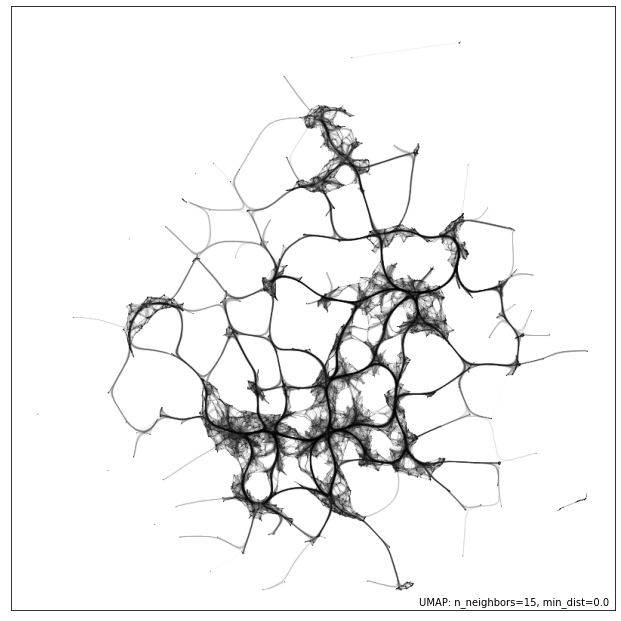

In [101]:
umap.plot.connectivity(umap_reduced, edge_bundling='hammer')